In [1]:
import scraper_eod as s
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
import time
from scipy.stats import norm
import seaborn as sns
from yahoo_fin import options
from yahoo_fin.stock_info import *
from yahoo_fin.stock_info import get_data, get_splits
import mibian
import time
m = s.StockMongo()
import indicator_daily as i

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)


In [18]:
f = m.stock_data.options_analisys.find({'ticker': 'FANG'})
f.count()

C:\Users\ander\AppData\Local\Temp/ipykernel_38612/1898116525.py:2: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  f.count()


3

In [19]:
f[2]

{'_id': ObjectId('6326ba6309568258cce74717'),
 'y0': 1.387776955296904,
 'sqr_rel_risk': -0.06226527742799529,
 'probability': 0.0579633679612691,
 'iv': 0.005131677680902101,
 'vix': -0.03619499456332023,
 'days_to_strike': -0.0023247679626402047,
 'ticker': 'FANG',
 'date': datetime.datetime(2022, 9, 18, 0, 0)}

In [20]:
o = i.Options('FANG', f[2])
o.options

,date,contractName,contractSize,contractPeriod,currency,type,inTheMoney,lastTradeDateTime,expirationDate,strike,...,rho,theoretical,intrinsicValue,timeValue,updatedAt,daysBeforeExpiration,iv,close,volatility,vix
0,2022-12-20,FANG230217C00120000,REGULAR,MONTHLY,USD,CALL,TRUE,2022-12-19,2023-02-17,120.0,...,0.1373,18.800,-117.44,0.0,2022-12-21,58,40.38,134.940002,0.306034,21.48
1,2022-12-20,FANG230217C00135000,REGULAR,MONTHLY,USD,CALL,FALSE,2022-12-20,2023-02-17,135.0,...,0.1026,8.950,-125.44,0.0,2022-12-21,58,40.38,134.940002,0.306034,21.48
2,2022-12-20,FANG230217C00140000,REGULAR,MONTHLY,USD,CALL,FALSE,2022-12-20,2023-02-17,140.0,...,0.0866,6.600,-128.16,0.0,2022-12-21,58,40.38,134.940002,0.306034,21.48
3,2022-12-20,FANG230217C00145000,REGULAR,MONTHLY,USD,CALL,FALSE,2022-12-20,2023-02-17,145.0,...,0.0706,4.800,-130.14,0.0,2022-12-21,58,40.38,134.940002,0.306034,21.48
4,2022-12-20,FANG230217C00150000,REGULAR,MONTHLY,USD,CALL,FALSE,2022-12-20,2023-02-17,150.0,...,0.0550,3.300,-131.34,0.0,2022-12-21,58,40.38,134.940002,0.306034,21.48
5,2022-12-20,FANG230217C00155000,REGULAR,MONTHLY,USD,CALL,FALSE,2022-12-20,2023-02-17,155.0,...,0.0414,2.225,-132.49,0.0,2022-12-21,58,40.38,134.940002,0.306034,21.48
6,2022-12-20,FANG230217C00160000,REGULAR,MONTHLY,USD,CALL,FALSE,2022-12-20,2023-02-17,160.0,...,0.0305,1.500,-133.59,0.0,2022-12-21,58,40.38,134.940002,0.306034,21.48
7,2022-12-20,FANG230217C00185000,REGULAR,MONTHLY,USD,CALL,FALSE,2022-12-05,2023-02-17,185.0,...,0.0064,0.250,-133.89,0.0,2022-12-21,58,40.38,134.940002,0.306034,21.48
8,2022-12-20,FANG230217P00100000,REGULAR,MONTHLY,USD,PUT,FALSE,2022-12-20,2023-02-17,100.0,...,-0.0117,0.650,134.29,0.0,2022-12-21,58,40.38,134.940002,0.306034,21.48
9,2022-12-20,FANG230217P00105000,REGULAR,MONTHLY,USD,PUT,FALSE,2022-12-19,2023-02-17,105.0,...,-0.0168,0.950,133.84,0.0,2022-12-21,58,40.38,134.940002,0.306034,21.48


<AxesSubplot:xlabel='rel_risk', ylabel='r'>

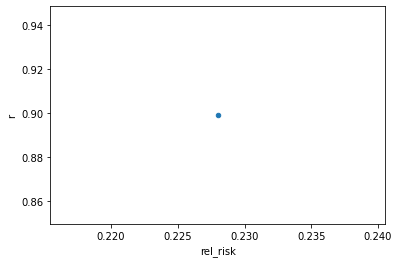

In [4]:
s = o.returns
#s[s.is_won].plot.scatter(x='probability', y='return')
#s.plot.scatter(x='rel_risk', y='return')
s[(s['rel_risk']>0)&(s['rel_risk']<3)&(s['r']>0)&(s['r']<2)].plot.scatter(x='rel_risk', y='r')
#o.strikeDates[0].volRange

In [5]:
s[(s['rel_risk']>0)&(s['rel_risk']<3)&(s['r']>0)&(s['r']<2)]

,strike_date,rel_risk,high_put,low_call,highStrikePut,lowStrikeCall,lowStrikePut,highStrikeCall,p,r,ticker
8,2023-02-17,0.228,0.32,0.55,15.0,30.0,17.5,32.5,0.408,0.899045,LAC


In [6]:
#m = s.StockMongo()
analisys = m.stock_data.options_analisys.find()
tickers = []
for a in analisys:
    tickers.append(a['ticker'])
t = list(set(tickers))

In [21]:
symbols = m.get_symbols()
list(set([sym['sym'] for sym in symbols]))

['ULTA',
 'WYNN',
 'DVN',
 'ETSY',
 'GOOG',
 'JD',
 'NET',
 'OKTA',
 'UBER',
 'LVS',
 'EQT',
 'RTX',
 'ADSK',
 'FANG',
 'GOOGL',
 'AMBA',
 'RBLX',
 'TSLA',
 'GS',
 'ADBE',
 'BAC',
 'CAR',
 'BROS',
 'NKLA',
 'JPM',
 'DE',
 'AZO',
 'APPS',
 'CHGG',
 'HON',
 'GM',
 'LI',
 'LYFT',
 'PFE',
 'NKE',
 'INTU',
 'ENPH',
 'GOLD',
 'COF',
 'SOLO',
 'NEE',
 'PARA',
 'NEM',
 'PYPL',
 'ALB',
 'AA',
 'UNP',
 'BA',
 'LOW',
 'CPNG',
 'DAL',
 'FB',
 'BABA',
 'T',
 'Z',
 'CF',
 'COST',
 'NUE',
 'COIN',
 'PLUG',
 'BKKT',
 'AR',
 'SPY',
 'BMY',
 'UNH',
 'BE',
 'RIO',
 'NVDA',
 'AAPL',
 'TDOC',
 'AAL',
 'ALGN',
 'CLF',
 'SNAP',
 'NOW',
 'WBA',
 'TMO',
 'SCHW',
 'SBUX',
 'CVS',
 'FUBO',
 'AMAT',
 'AVGO',
 'UPST',
 'SNOW',
 'INTC',
 'ALK',
 'WMT',
 'AMR',
 'JBLU',
 'BP',
 'BNTX',
 'COP',
 'HD',
 'CCJ',
 'M',
 'CROX',
 'ROKU',
 'AMZN',
 'UAL',
 'BIDU',
 'ORCL',
 'CPRI',
 'SHOP',
 'TMUS',
 'LAC',
 'CHTR',
 'FDX',
 'KSS',
 'GME',
 'LUV',
 'SOFI',
 'ASAN',
 'DHR',
 'AFRM',
 'AI',
 'ADM',
 'DKS',
 'FCX',
 'BHC',
 '

In [8]:
print("running data aggregation")
returns = []
for tick in t:
    try:
        o = i.Options(tick)
        s = o.returns
        s = s[(s['rel_risk']>0)&(s['rel_risk']<3)&(s['r']>0)&(s['r']<2)].copy()
        returns.append(s)
    except:
        print(tick)

running data aggregation


C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x

C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_

TWTR


C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)


NKE


C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_t

ISRG


C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is d

C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is dis

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_

NKE


C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x

C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_

C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_

TWTR


C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_

ISRG


C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is d

C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is dis

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

TWTR


C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x

TWTR


C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x

NKE


C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is d

TWTR


C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

NKE


C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)


ISRG


C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is di

In [9]:
b = pd.concat(returns)

In [10]:
b.sort_values(by=['r'])

,strike_date,rel_risk,high_put,low_call,highStrikePut,lowStrikeCall,lowStrikePut,highStrikeCall,p,r,ticker
5,2023-01-20,0.007000,0.07,0.35,75.0,300.0,95.0,310.0,1.088,0.018514,MRNA
5,2023-01-20,0.007000,0.07,0.35,75.0,300.0,95.0,310.0,1.088,0.018514,MRNA
7,2023-01-20,0.004000,0.03,0.04,52.5,90.0,52.5,95.0,1.360,0.030701,BMY
7,2023-01-20,0.004000,0.03,0.04,52.5,90.0,52.5,95.0,1.360,0.030701,BMY
7,2023-01-20,0.004000,0.03,0.04,52.5,90.0,52.5,95.0,1.360,0.030701,BMY
...,...,...,...,...,...,...,...,...,...,...,...
0,2023-01-20,0.026667,0.03,0.12,21.0,38.0,24.0,40.0,0.408,1.921881,BP
0,2023-01-20,0.026667,0.03,0.12,21.0,38.0,24.0,40.0,0.408,1.921881,BP
16,2023-02-17,0.120000,3.12,2.35,190.0,230.0,190.0,245.0,0.408,1.933644,UNP
16,2023-02-17,0.120000,3.12,2.35,190.0,230.0,190.0,245.0,0.408,1.933644,UNP


In [11]:
c = b[(b['rel_risk']>0.25)&(b['p']>0.5)].copy()

In [12]:
c.sort_values(by=['r'])

,strike_date,rel_risk,high_put,low_call,highStrikePut,lowStrikeCall,lowStrikePut,highStrikeCall,p,r,ticker
4,2023-01-20,2.252500,0.20,45.25,34.40,125.00,54.40,134.40,0.952,0.038991,COF
4,2023-01-20,2.252500,0.20,45.25,34.40,125.00,54.40,134.40,0.952,0.038991,COF
4,2023-01-20,2.252500,0.20,45.25,34.40,125.00,54.40,134.40,0.952,0.038991,COF
4,2023-01-20,2.252500,0.20,45.25,34.40,125.00,54.40,134.40,0.952,0.038991,COF
4,2023-01-20,2.252500,0.20,45.25,34.40,125.00,54.40,134.40,0.952,0.038991,COF
17,2023-02-17,0.256000,0.74,1.08,47.50,75.00,50.00,77.50,0.544,0.254279,OXY
17,2023-02-17,0.256000,0.74,1.08,47.50,75.00,50.00,77.50,0.544,0.254279,OXY
17,2023-02-17,0.256000,0.59,0.85,40.00,62.50,42.50,65.00,0.544,0.413789,MU
17,2023-02-17,0.256000,0.59,0.85,40.00,62.50,42.50,65.00,0.544,0.413789,MU
1,2023-01-20,0.320000,0.24,0.42,28.00,34.00,29.00,35.00,0.544,0.493085,BAC


In [17]:
t = list(set(tickers))

In [19]:
t

['ULTA',
 'WYNN',
 'DVN',
 'ETSY',
 'GOOG',
 'JD',
 'NET',
 'OKTA',
 'UBER',
 'LVS',
 'EQT',
 'RTX',
 'ADSK',
 'FANG',
 'AMBA',
 'RBLX',
 'ADBE',
 'GS',
 'BAC',
 'CAR',
 'BROS',
 'CHGG',
 'LI',
 'NKLA',
 'PFE',
 'APPS',
 'AZO',
 'HON',
 'GM',
 'LYFT',
 'DE',
 'GOLD',
 'NKE',
 'ENPH',
 'INTU',
 'PG',
 'COF',
 'SOLO',
 'NEE',
 'PARA',
 'NEM',
 'PYPL',
 'ALB',
 'AA',
 'UNP',
 'DAL',
 'LOW',
 'CPNG',
 'BA',
 'BABA',
 'T',
 'Z',
 'CF',
 'NUE',
 'COST',
 'PLUG',
 'BKKT',
 'AR',
 'UNH',
 'BMY',
 'BE',
 'RIO',
 'TDOC',
 'AAPL',
 'NVDA',
 'AAL',
 'ALGN',
 'CLF',
 'SNAP',
 'WBA',
 'NOW',
 'TMO',
 'SCHW',
 'SBUX',
 'CVS',
 'FUBO',
 'AMAT',
 'UPST',
 'AVGO',
 'SNOW',
 'INTC',
 'ALK',
 'WMT',
 'JBLU',
 'AMR',
 'BP',
 'BNTX',
 'HD',
 'ROKU',
 'CCJ',
 'M',
 'CROX',
 'COP',
 'UAL',
 'BIDU',
 'ORCL',
 'CPRI',
 'SHOP',
 'TMUS',
 'LAC',
 'CHTR',
 'FDX',
 'KSS',
 'GME',
 'LUV',
 'SOFI',
 'ASAN',
 'AFRM',
 'DHR',
 'AI',
 'ADM',
 'DKS',
 'FCX',
 'BHC',
 'TSM',
 'TWLO',
 'IBM',
 'AXP',
 'TLRY',
 'CVNA',
 'LR

In [2]:
t = i.TickerAggregation()

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)


ISRG
TWTR
NKE


In [5]:
portfolio = m.get_portfolio(None)
port = pd.DataFrame.from_records(portfolio)
port

,_id,strike_date,rel_risk,high_put_value,low_call_value,high_call_value,low_put_value,highStrikePut,lowStrikeCall,lowStrikePut,highStrikeCall,p,r,ticker,date,value,direction
0,639f90d0271dab5a67b27d79,2023-01-20,0.68200,4.80,11.31,5.80,8.90,87.65,167.7,92.65,172.7,1.088,0.736305,FANG,2022-12-18,10.61,1
1,639f90d0271dab5a67b27d7a,2023-01-20,0.45096,7.20,49.20,21.37,7.00,1600.00,2175.0,1710.00,2300.0,0.408,0.879950,BKNG,2022-12-18,41.80,1
2,639f90d0271dab5a67b27d7b,2023-02-17,0.44000,3.00,4.50,4.30,3.60,105.00,175.0,110.00,180.0,0.408,0.496203,SNOW,2022-12-18,2.10,1
3,639f90d0271dab5a67b27d7c,2023-02-17,0.39200,2.95,3.70,3.95,2.74,155.00,210.0,160.00,215.0,0.408,1.024109,BA,2022-12-18,0.54,1
4,63a2e225fb3bfd92736812de,2023-02-17,0.40000,6.80,8.90,7.85,7.95,230.00,340.0,235.00,345.0,0.408,0.596819,NFLX,2022-12-21,3.25,1
5,63a2e226fb3bfd92736812df,2023-02-17,0.37600,1.32,2.34,1.76,1.84,45.00,75.0,47.50,77.5,0.408,0.364630,SQ,2022-12-21,1.54,1
6,63a2e226fb3bfd92736812e0,2023-02-17,0.36200,3.42,4.22,4.31,3.30,130.00,190.0,135.00,195.0,0.408,0.925014,NVDA,2022-12-21,0.68,1
7,63a2e226fb3bfd92736812e1,2023-02-17,0.35200,0.72,2.03,1.04,1.47,37.50,65.0,40.00,67.5,0.408,0.318059,DOCU,2022-12-21,2.06,1
8,63a2e45e1a9675bf13f1e581,2023-02-17,0.51000,5.15,9.75,7.00,6.50,220.00,380.0,230.00,390.0,0.408,0.773658,ENPH,2022-12-21,5.95,1
9,63a2e45e1a9675bf13f1e582,2023-01-27,0.47200,2.08,4.40,2.08,2.04,160.00,240.0,160.00,245.0,0.408,0.439498,MRNA,2022-12-21,2.28,1


In [6]:
port.iloc[0]

_id                639f90d0271dab5a67b27d79
strike_date             2023-01-20 00:00:00
rel_risk                              0.682
high_put_value                          4.8
low_call_value                        11.31
high_call_value                         5.8
low_put_value                           8.9
highStrikePut                         87.65
lowStrikeCall                         167.7
lowStrikePut                          92.65
highStrikeCall                        172.7
p                                     1.088
r                                  0.736305
ticker                                 FANG
date                    2022-12-18 00:00:00
value                                 10.61
direction                                 1
Name: 0, dtype: object

In [7]:
op = [o for o in t.options if o is not None]
options = [o.options for o in op if o.ticker == port.iloc[0]['ticker']]

In [9]:
options[0]

,date,contractName,contractSize,contractPeriod,currency,type,inTheMoney,lastTradeDateTime,expirationDate,strike,...,rho,theoretical,intrinsicValue,timeValue,updatedAt,daysBeforeExpiration,iv,close,volatility,vix
0,2022-12-20,FANG230217C00120000,REGULAR,MONTHLY,USD,CALL,TRUE,2022-12-19,2023-02-17,120.0,...,0.1373,18.800,-117.44,0.0,2022-12-21,58,40.38,134.940002,0.306034,21.48
1,2022-12-20,FANG230217C00135000,REGULAR,MONTHLY,USD,CALL,FALSE,2022-12-20,2023-02-17,135.0,...,0.1026,8.950,-125.44,0.0,2022-12-21,58,40.38,134.940002,0.306034,21.48
2,2022-12-20,FANG230217C00140000,REGULAR,MONTHLY,USD,CALL,FALSE,2022-12-20,2023-02-17,140.0,...,0.0866,6.600,-128.16,0.0,2022-12-21,58,40.38,134.940002,0.306034,21.48
3,2022-12-20,FANG230217C00145000,REGULAR,MONTHLY,USD,CALL,FALSE,2022-12-20,2023-02-17,145.0,...,0.0706,4.800,-130.14,0.0,2022-12-21,58,40.38,134.940002,0.306034,21.48
4,2022-12-20,FANG230217C00150000,REGULAR,MONTHLY,USD,CALL,FALSE,2022-12-20,2023-02-17,150.0,...,0.0550,3.300,-131.34,0.0,2022-12-21,58,40.38,134.940002,0.306034,21.48
5,2022-12-20,FANG230217C00155000,REGULAR,MONTHLY,USD,CALL,FALSE,2022-12-20,2023-02-17,155.0,...,0.0414,2.225,-132.49,0.0,2022-12-21,58,40.38,134.940002,0.306034,21.48
6,2022-12-20,FANG230217C00160000,REGULAR,MONTHLY,USD,CALL,FALSE,2022-12-20,2023-02-17,160.0,...,0.0305,1.500,-133.59,0.0,2022-12-21,58,40.38,134.940002,0.306034,21.48
7,2022-12-20,FANG230217C00185000,REGULAR,MONTHLY,USD,CALL,FALSE,2022-12-05,2023-02-17,185.0,...,0.0064,0.250,-133.89,0.0,2022-12-21,58,40.38,134.940002,0.306034,21.48
8,2022-12-20,FANG230217P00100000,REGULAR,MONTHLY,USD,PUT,FALSE,2022-12-20,2023-02-17,100.0,...,-0.0117,0.650,134.29,0.0,2022-12-21,58,40.38,134.940002,0.306034,21.48
9,2022-12-20,FANG230217P00105000,REGULAR,MONTHLY,USD,PUT,FALSE,2022-12-19,2023-02-17,105.0,...,-0.0168,0.950,133.84,0.0,2022-12-21,58,40.38,134.940002,0.306034,21.48


In [10]:
o = options[0]
call1 = o[(o['strike'] == port.iloc[0]['lowStrikeCall'])&(o['expirationDate'] == port.iloc[0]['strike_date'])&(o['type'] == 'CALL')][['date', 'lastPrice', 'expirationDate', 'strike', 'daysBeforeExpiration', 'iv']]
call1.columns = ['date', 'callLow', 'expirationDate', 'strikeCallLow', 'daysBeforeExpiration', 'iv']
call2 = o[(o['strike'] == port.iloc[0]['highStrikeCall'])&(o['expirationDate'] == port.iloc[0]['strike_date'])&(o['type'] == 'CALL')][['date', 'lastPrice', 'strike']]
call2.columns = ['date', 'callHigh', 'strikeCallHigh']
put1 = o[(o['strike'] == port.iloc[0]['lowStrikePut'])&(o['expirationDate'] == port.iloc[0]['strike_date'])&(o['type'] == 'CALL')][['date', 'lastPrice', 'strike']]
put1.columns = ['date', 'putLow', 'strikePutLow']
put2 = o[(o['strike'] == port.iloc[0]['highStrikePut'])&(o['expirationDate'] == port.iloc[0]['strike_date'])&(o['type'] == 'CALL')][['date', 'lastPrice', 'strike']]
put2.columns = ['date', 'putHigh', 'strikePutHigh']

condor = call1.merge(call2, on='date', how='inner')
condor = condor.merge(put1, on='date', how='inner')
condor = condor.merge(put2, on='date', how='inner')

condor['condor'] = condor.callLow-condor.callHigh-condor.putHigh+condor.putLow

<AxesSubplot:>

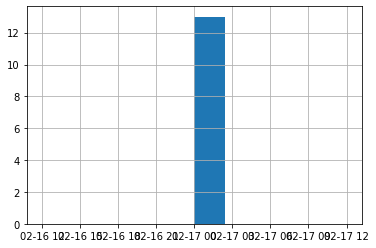

In [17]:
o['expirationDate'].hist()

In [32]:
op[(op['strike'] == element['lowStrikePut'])&(op['expirationDate'] == element['strike_date'])&(op['type'] == 'PUT')]

,date,contractName,contractSize,contractPeriod,currency,type,inTheMoney,lastTradeDateTime,expirationDate,strike,...,rho,theoretical,intrinsicValue,timeValue,updatedAt,daysBeforeExpiration,iv,close,volatility,vix


In [31]:
element.keys()

Index(['_id', 'strike_date', 'rel_risk', 'high_put_value', 'low_call_value',
       'high_call_value', 'low_put_value', 'highStrikePut', 'lowStrikeCall',
       'lowStrikePut', 'highStrikeCall', 'p', 'r', 'ticker', 'date', 'value',
       'direction'],
      dtype='object')

In [71]:
c = c.drop(['low_call', 'high_put'], axis=1)

In [6]:
tickers = []

In [10]:
def get_trade(row):
    if len(tickers) <3:
        if row['ticker'] not in tickers:
            tickers.append(row['ticker'])
        else:
            print("sf")
            print(row['ticker'])
    else:
        print("nbo")

In [11]:
for index, row in selected_trades.iterrows():
    if len(tickers) > 3:
        break
    get_trade(row)

nbo
nbo
nbo
nbo
nbo
nbo


In [12]:
tickers

['ENPH', 'MRNA', 'HD']

In [74]:
d = m.get_portfolio()

In [75]:
d.count()

C:\Users\ander\AppData\Local\Temp/ipykernel_76088/1918412174.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  d.count()


1

In [78]:
d[0]

{'_id': ObjectId('639f708269e4a4ed0522395f'),
 'strike_date': datetime.datetime(2023, 1, 20, 0, 0),
 'rel_risk': 0.682,
 'high_put_value': 4.8,
 'low_call_value': 11.31,
 'high_call_value': 5.8,
 'low_put_value': 8.9,
 'highStrikePut': 87.65,
 'lowStrikeCall': 167.7,
 'lowStrikePut': 92.65,
 'highStrikeCall': 172.7,
 'p': 1.088,
 'r': 0.7363046334324687,
 'ticker': 'FANG',
 'date': datetime.datetime(2022, 12, 18, 0, 0),
 'value': 10.61}

In [85]:
del e["_id"]

In [82]:
e = d[0]

In [86]:
e.keys()

dict_keys(['strike_date', 'rel_risk', 'high_put_value', 'low_call_value', 'high_call_value', 'low_put_value', 'highStrikePut', 'lowStrikeCall', 'lowStrikePut', 'highStrikeCall', 'p', 'r', 'ticker', 'date', 'value'])

In [91]:
e

{'strike_date': datetime.datetime(2023, 1, 20, 0, 0),
 'rel_risk': 0.682,
 'high_put_value': 4.8,
 'low_call_value': 11.31,
 'high_call_value': 5.8,
 'low_put_value': 8.9,
 'highStrikePut': 87.65,
 'lowStrikeCall': 167.7,
 'lowStrikePut': 92.65,
 'highStrikeCall': 172.7,
 'p': 1.088,
 'r': 0.7363046334324687,
 'ticker': 'FANG',
 'date': datetime.datetime(2022, 12, 18, 0, 0),
 'value': 10.61}

In [ ]:
c[c['highStrikePut'] == ]